In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style()

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Возьмем [Экспоненциальное распределение](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5).

$Exp({\lambda})$

Сгенерируем выборку объема 1000.

In [2]:
# так как 𝜆 -- это интенсивность или обратный коэффициент масштаба 
# и 𝜆 > 0
# возьмем 𝜆 = 1, тогда scale = 1, т.е. значение по-умолчанию
expo = sts.expon()
sample = expo.rvs(size=1000)

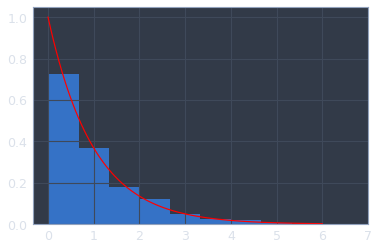

In [3]:
# постройте гистограмму выборки и нарисуйте поверх неё
# теоретическую плотность распределения вашей случайной величины

x = np.linspace(0, 6,100)
y = expo.pdf(x)

plt.hist(sample, density=True)
plt.plot(x, y, color='red')

При трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

Формулы с вики, но с ними результат получался не такой, как ожидался.
Почему я не знаю :(
Взял формулы из репозитория Ромы...Рома спасибО!

Дисперсия:	$λ^{-2}$

Математическое ожидание, или среднее: 	$λ^{−1}$

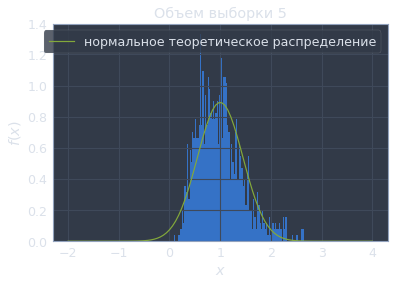

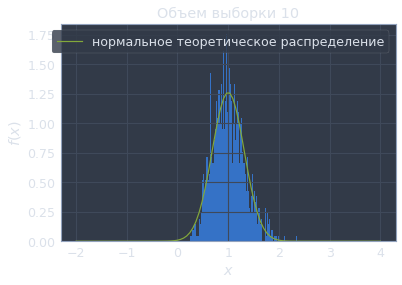

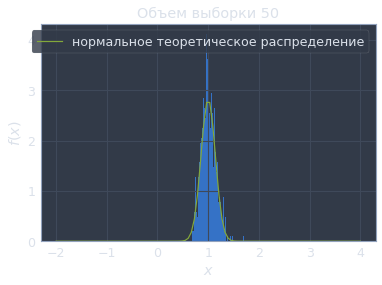

In [4]:
for n in [5, 10, 50]:
    # 1000 средних от выборки объемом n
    sample = [expo.rvs(n).mean() for i in range(1000)]
    # гистограма результата
    plt.hist(sample, 100, density=True)
    
    # точки для графика
    x = np.linspace(-2, 4, 100)
    # среднее равно scale, но я не знаю почему
    loc = 1
    # дисперсия (формулу взял у Ромы, с формулой из вики всё ломалось)
    std = np.sqrt(loc**2 / n)
    # нормальное распределение от результатов экспоненциального распределения(?)
    norm = sts.norm.pdf(x, loc, std)
    
    # отрисовываем результат
    plt.plot(x, norm, label='нормальное теоретическое распределение')
    plt.legend()
    plt.title(f'Объем выборки {n}')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

На графиках четко видно, что с ростом обхема выборки аппроксимация функции становится точнее.

хотя я наблюдаю пиковые значения на гистограме и они вроде как должны были бы быть покрыты графиком нормального теоретического распределения....возможно где-то допущена ошибка :(